In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = np.loadtxt('../data/env1/x.csv', delimiter=',',encoding="utf-8-sig")
y_data = np.loadtxt('../data/env1/y.csv', delimiter=',',encoding="utf-8-sig")
theta_data = np.loadtxt('../data/env1/theta.csv', delimiter=',',encoding="utf-8-sig")
phi_data = np.loadtxt('../data/env1/phi.csv', delimiter=',',encoding="utf-8-sig")
v_data = np.loadtxt('../data/env1/v.csv', delimiter=',',encoding="utf-8-sig")
evaluation = np.loadtxt('../data/env1/evaluation.csv', delimiter=',',encoding="utf-8-sig")

In [3]:
df_x = pd.DataFrame(x_data)
df_y = pd.DataFrame(y_data)
df_theta = pd.DataFrame(theta_data)
df_phi = pd.DataFrame(phi_data)
df_v = pd.DataFrame(v_data)
df_evaluation = pd.DataFrame(evaluation)

In [5]:
df_path_category = pd.DataFrame(columns=['initial_theta', 'terminal_theta', 'category'])

In [6]:
#pathを初期姿勢、終端姿勢に応じて分類する{'初期姿勢に関する分類番号''終端姿勢に関する分類番号'}
#-90 <=theta <  -45 ->1
#-45 <=theta <  0   ->2
#0   <theta  <= 45  ->3
#45  <theta  <= 90  ->4

for i in range(len(df_theta)):
    initial_theta = df_theta.iloc[i, 0]
    terminal_theta = df_theta.iloc[i, -1]
    
    if -np.pi/2 <= initial_theta < -np.pi/4:
        initial_theta_category_number = 1
    elif -np.pi/4 <= initial_theta < 0:
        initial_theta_category_number = 2
    elif 0 <= initial_theta < np.pi/4:
        initial_theta_category_number = 3
    elif np.pi/4 <= initial_theta < np.pi/2:
        initial_theta_category_number = 4
    else:
        print('Warning')
        
    if -np.pi/2 <= terminal_theta < -np.pi/4:
        terminal_theta_category_number = 1
    elif -np.pi/4 <= terminal_theta < 0:
        terminal_theta_category_number = 2
    elif 0 <= terminal_theta < np.pi/4:
        terminal_theta_category_number = 3
    elif np.pi/4 <= terminal_theta < np.pi/2:
        terminal_theta_category_number = 4
    else:
        print('Warning')
        
    path_category = 10 * initial_theta_category_number + terminal_theta_category_number
    
    pd_data = pd.DataFrame({'initial_theta':initial_theta_category_number, 'terminal_theta':terminal_theta_category_number, 'category':path_category},index=[i])
    df_path_category = pd.concat([df_path_category,pd_data])

In [7]:
df_path_category

,initial_theta,terminal_theta,category
0,3,3,33
1,1,2,12
2,3,4,34
3,1,4,14
4,2,4,24
...,...,...,...
25268,2,2,22
25269,1,1,11
25270,4,1,41
25271,4,3,43


In [8]:
#各カテゴリーに属するpathの総数
vc = df_path_category['category'].value_counts()
print(vc)

category
22    1621
14    1611
23    1603
41    1600
31    1600
12    1597
32    1587
43    1585
21    1574
13    1567
11    1565
33    1564
34    1556
24    1555
42    1555
44    1533
Name: count, dtype: int64


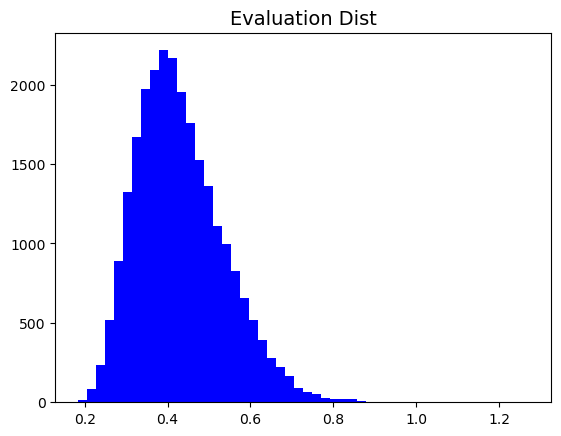

In [9]:
#path全体に対するevaluationの分布
plt.hist(df_evaluation[0] ,bins = 50, color = 'Blue')
plt.title('Evaluation Dist', fontsize=14)
plt.show()

In [10]:
#categoryとevaluationのdfを結合
df_category_and_eval = pd.concat([df_path_category, df_evaluation], axis=1)
df_category_and_eval = df_category_and_eval.rename(columns={0: 'evaluation'})
df_category_and_eval

,initial_theta,terminal_theta,category,evaluation
0,3,3,33,0.377023
1,1,2,12,0.525684
2,3,4,34,0.366827
3,1,4,14,0.633506
4,2,4,24,0.504845
...,...,...,...,...
25268,2,2,22,0.489894
25269,1,1,11,0.422908
25270,4,1,41,0.381459
25271,4,3,43,0.355787


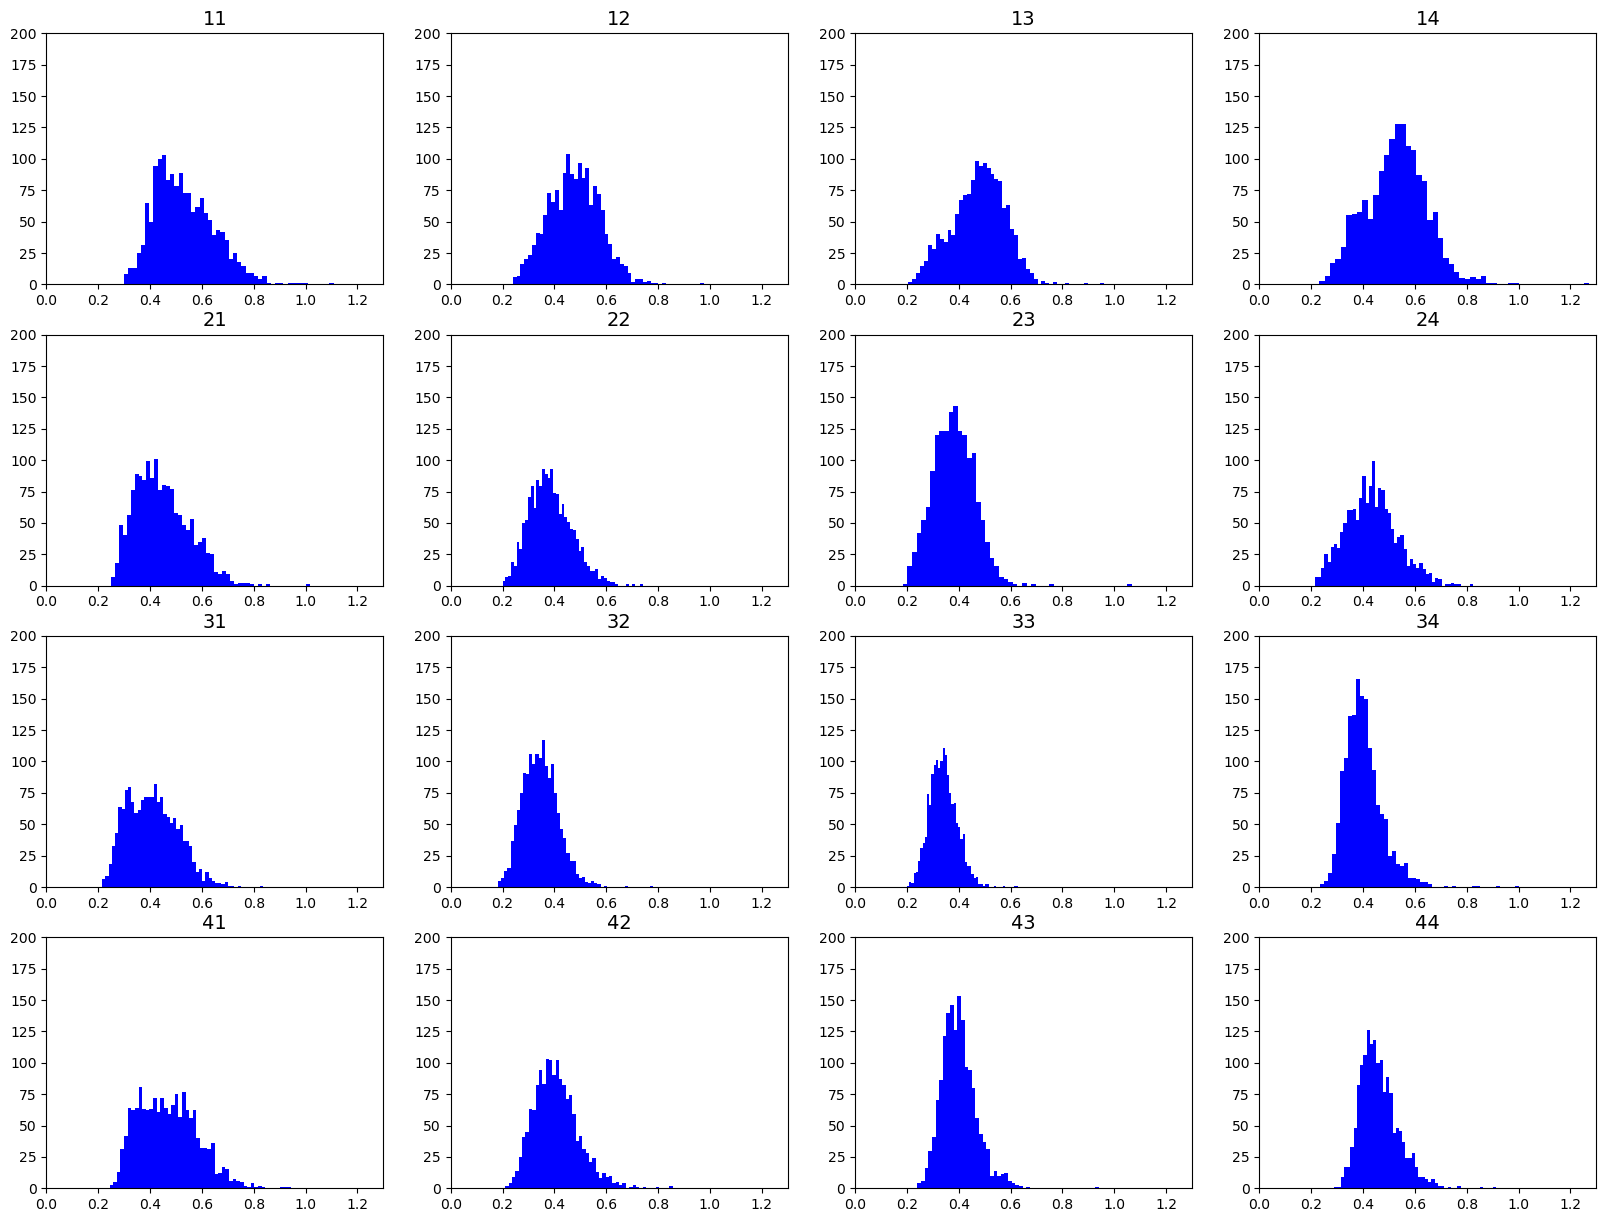

In [13]:
#categoryごとのevaluaitonの分布を表示する
fig, axes = plt.subplots(4, 4, figsize=(20,15))

for i in range(4):
    for j in range(4):
        category_num = 10*(i+1) + (j+1)
        axes[i, j].hist(df_category_and_eval[df_category_and_eval['category'] == category_num]['evaluation'] ,bins = 50, color = 'Blue')
        axes[i, j].set_xlim(0, 1.3)
        axes[i, j].set_ylim(0, 200)
        axes[i, j].set_title("{}".format(category_num), fontsize=14)

plt.show()

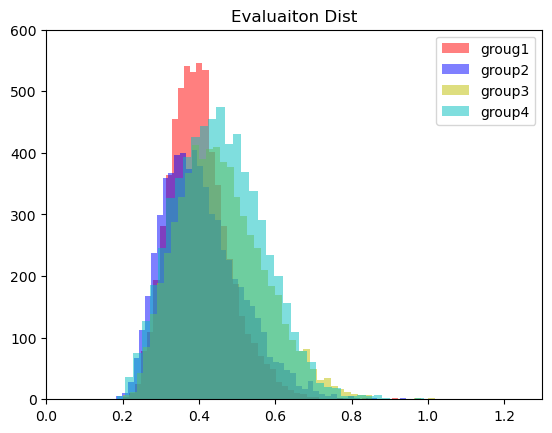

In [34]:
#指定グループの分布を作成
plt.hist(df_category_and_eval[(df_category_and_eval['category'] == 33) | (df_category_and_eval['category'] == 34) | (df_category_and_eval['category'] == 43) | (df_category_and_eval['category'] == 44)]['evaluation'] ,bins = 50, alpha=0.5, color='r', label='groug1')
plt.hist(df_category_and_eval[(df_category_and_eval['category'] == 31) | (df_category_and_eval['category'] == 32) | (df_category_and_eval['category'] == 41) | (df_category_and_eval['category'] == 42)]['evaluation'] ,bins = 50, alpha=0.5, color='b', label='group2')
plt.hist(df_category_and_eval[(df_category_and_eval['category'] == 11) | (df_category_and_eval['category'] == 12) | (df_category_and_eval['category'] == 21) | (df_category_and_eval['category'] == 22)]['evaluation'] ,bins = 50, alpha=0.5, color='y', label='group3')
plt.hist(df_category_and_eval[(df_category_and_eval['category'] == 13) | (df_category_and_eval['category'] == 14) | (df_category_and_eval['category'] == 23) | (df_category_and_eval['category'] == 24)]['evaluation'] ,bins = 50, alpha=0.5, color='c', label='group4')

plt.xlim(0, 1.3)
plt.ylim(0, 600)
plt.title("Evaluaiton Dist")
plt.legend(loc='upper right')
plt.show()

In [18]:
#各ヒストグラムの中央値より小さいデータのindexを抽出する
index_set = set()

for i in range(4):
    for j in range(4):
        category_num = 10*(i+1) + (j+1)
        median = df_category_and_eval[df_category_and_eval['category'] == category_num]['evaluation'].quantile(0.25)
        List = df_category_and_eval[df_category_and_eval['category'] == category_num].index[df_category_and_eval[df_category_and_eval['category'] == category_num]['evaluation'] <= median].tolist()
        Set = set(List)
        index_set = index_set | Set
    
print(len(index_set))

6324


In [19]:
len(x_data)

25273

In [20]:
index_bool = []
for i in range(len(x_data)):
    if i in index_set:
        index_bool.append(True)
    else:
        index_bool.append(False)
        
print(index_bool)
print(len(index_bool))

[False, False, False, False, False, True, False, True, True, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, True, False, True, False, False, False, False, True, False, True, False,

In [21]:
#指定したindexのpathをcsvに保存
x_data_extract = x_data[index_bool]
y_data_extract = y_data[index_bool]
theta_data_extract = theta_data[index_bool]
phi_data_extract = phi_data[index_bool]
v_data_extract = v_data[index_bool]


np.savetxt('../data/env1/first_quantile_x.csv', x_data_extract, delimiter=","  )
np.savetxt('../data/env1/first_quantile_y.csv', y_data_extract, delimiter=","  )
np.savetxt('../data/env1/first_quantile_theta.csv', theta_data_extract, delimiter=","  )
np.savetxt('../data/env1/first_quantile_phi.csv', phi_data_extract, delimiter=","  )
np.savetxt('../data/env1/first_quantile_v.csv', v_data_extract, delimiter=","  )
